In [61]:
import pickle
from judge import extracted_boxed_answer_equiv, extract_boxed_answer, is_equiv
from datasets import load_dataset
from transformers import AutoTokenizer
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
ds = load_dataset("agentica-org/DeepScaleR-Preview-Dataset", split='train')
tokenizer = AutoTokenizer.from_pretrained("deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B")

In [13]:
ds[0]

{'problem': 'The operation $\\otimes$ is defined for all nonzero numbers by $a \\otimes b = \\frac{a^{2}}{b}$. Determine $[(1 \\otimes 2) \\otimes 3] - [1 \\otimes (2 \\otimes 3)]$.',
 'answer': '-\\frac{2}{3}',
 'solution': '1. **Apply the operation $\\otimes$ to the innermost parentheses first:**\n   \\[\n   (1 \\otimes 2) \\otimes 3 = \\left(\\frac{1^2}{2}\\right) \\otimes 3 = \\frac{1}{2} \\otimes 3\n   \\]\n   \\[\n   1 \\otimes (2 \\otimes 3) = 1 \\otimes \\left(\\frac{2^2}{3}\\right) = 1 \\otimes \\frac{4}{3}\n   \\]\n\n2. **Calculate each part using the definition of $\\otimes$:**\n   \\[\n   \\frac{1}{2} \\otimes 3 = \\frac{\\left(\\frac{1}{2}\\right)^2}{3} = \\frac{\\frac{1}{4}}{3} = \\frac{1}{12}\n   \\]\n   \\[\n   1 \\otimes \\frac{4}{3} = \\frac{1^2}{\\frac{4}{3}} = \\frac{1}{\\frac{4}{3}} = \\frac{3}{4}\n   \\]\n\n3. **Subtract the two results:**\n   \\[\n   \\left(\\frac{1}{12}\\right) - \\left(\\frac{3}{4}\\right) = \\frac{1}{12} - \\frac{9}{12} = -\\frac{8}{12} = -\\f

In [37]:
def get_stats(data):

    rewards = []
    lengths = []
    correct_lengths = []
    incorrect_lengths = []
    
    for key in data:

        total_length = 0
        total_correct_length = 0
        total_incorrect_length = 0
        total_reward = 0
        
        for output in data[key].outputs:
            length = len(output.token_ids)
            reward = is_equiv(extract_boxed_answer(output.text), ds[key]['answer'])
            
            total_length += length
            total_reward += reward
            if reward:
                total_correct_length += len(output.token_ids)
            else:
                total_incorrect_length += len(output.token_ids)
        
        total = len(data[key].outputs)

        lengths.append(total_length / total)
        rewards.append(total_reward / total)
        
        if total_reward == 0:
            correct_lengths.append(-1)
        else:
            correct_lengths.append(total_correct_length / total_reward)
        
        if total_reward == total:
            incorrect_lengths.append(-1)
        else:
            incorrect_lengths.append(total_incorrect_length / (total - total_reward))
    
    return rewards, lengths, correct_lengths, incorrect_lengths


In [49]:
all_rewards = []
all_lengths = []
all_correct_lengths = []
all_incorrect_lengths = []

for n in tqdm(range(0, 40315, 1024)):
    
    start = n
    end = min(n + 1024, 40315)
    print(start, end)
    with open(f"../../data/DeepScaleR-Preview-Dataset/pass_at_k_{start}_{end}.pkl", "rb") as f:
        data = pickle.load(f)
    
    rewards, lengths, correct_lengths, incorrect_lengths = get_stats(data)
    all_rewards.extend(rewards)
    all_lengths.extend(lengths)
    all_correct_lengths.extend(correct_lengths)
    all_incorrect_lengths.extend(incorrect_lengths)

  0%|          | 0/40 [00:00<?, ?it/s]

0 1024


  2%|▎         | 1/40 [00:04<02:46,  4.28s/it]

1024 2048


  5%|▌         | 2/40 [00:07<02:17,  3.62s/it]

2048 3072


  8%|▊         | 3/40 [00:10<02:03,  3.33s/it]

3072 4096


 10%|█         | 4/40 [00:14<02:10,  3.61s/it]

4096 5120


 12%|█▎        | 5/40 [00:18<02:15,  3.87s/it]

5120 6144


 15%|█▌        | 6/40 [00:21<02:01,  3.59s/it]

6144 7168


 18%|█▊        | 7/40 [00:25<02:00,  3.66s/it]

7168 8192


 20%|██        | 8/40 [00:29<01:55,  3.60s/it]

8192 9216


 22%|██▎       | 9/40 [00:32<01:52,  3.64s/it]

9216 10240


 25%|██▌       | 10/40 [00:36<01:49,  3.64s/it]

10240 11264


 28%|██▊       | 11/40 [00:39<01:42,  3.53s/it]

11264 12288


 30%|███       | 12/40 [00:43<01:39,  3.55s/it]

12288 13312


 32%|███▎      | 13/40 [00:47<01:38,  3.63s/it]

13312 14336


 35%|███▌      | 14/40 [00:51<01:36,  3.72s/it]

14336 15360


 38%|███▊      | 15/40 [00:55<01:35,  3.83s/it]

15360 16384


 40%|████      | 16/40 [00:58<01:29,  3.74s/it]

16384 17408


 42%|████▎     | 17/40 [01:02<01:23,  3.65s/it]

17408 18432


 45%|████▌     | 18/40 [01:05<01:17,  3.51s/it]

18432 19456


 48%|████▊     | 19/40 [01:08<01:11,  3.40s/it]

19456 20480


 50%|█████     | 20/40 [01:11<01:06,  3.31s/it]

20480 21504


 52%|█████▎    | 21/40 [01:14<01:00,  3.20s/it]

21504 22528


 55%|█████▌    | 22/40 [01:17<00:55,  3.06s/it]

22528 23552


 57%|█████▊    | 23/40 [01:20<00:51,  3.04s/it]

23552 24576


 60%|██████    | 24/40 [01:23<00:48,  3.03s/it]

24576 25600


 62%|██████▎   | 25/40 [01:26<00:45,  3.07s/it]

25600 26624


 65%|██████▌   | 26/40 [01:30<00:45,  3.25s/it]

26624 27648


 68%|██████▊   | 27/40 [01:33<00:44,  3.42s/it]

27648 28672


 70%|███████   | 28/40 [01:37<00:42,  3.58s/it]

28672 29696


 72%|███████▎  | 29/40 [01:41<00:39,  3.61s/it]

29696 30720


 75%|███████▌  | 30/40 [01:45<00:36,  3.64s/it]

30720 31744


 78%|███████▊  | 31/40 [01:49<00:33,  3.68s/it]

31744 32768


 80%|████████  | 32/40 [01:52<00:28,  3.60s/it]

32768 33792


 82%|████████▎ | 33/40 [01:54<00:22,  3.27s/it]

33792 34816


 85%|████████▌ | 34/40 [01:56<00:16,  2.82s/it]

34816 35840


 88%|████████▊ | 35/40 [01:58<00:13,  2.62s/it]

35840 36864


 90%|█████████ | 36/40 [02:02<00:11,  2.80s/it]

36864 37888


 92%|█████████▎| 37/40 [02:04<00:08,  2.74s/it]

37888 38912


 95%|█████████▌| 38/40 [02:06<00:04,  2.48s/it]

38912 39936


 98%|█████████▊| 39/40 [02:08<00:02,  2.26s/it]

39936 40315


100%|██████████| 40/40 [02:09<00:00,  3.24s/it]


In [50]:
ds = ds.add_column('reward', all_rewards)
ds = ds.add_column('length', all_lengths)
ds = ds.add_column('correct_length', all_correct_lengths)
ds = ds.add_column('incorrect_length', all_incorrect_lengths)

In [53]:
ds[1]

{'problem': 'Doug constructs a square window using $8$ equal-size panes of glass. The ratio of the height to width for each pane is $5 : 2$, and the borders around and between the panes are $2$ inches wide. In inches, what is the side length of the square window?',
 'answer': '26',
 'solution': '1. **Identify the dimensions of each pane**: Given that the ratio of the height to the width of each pane is $5:2$, let the height of each pane be $5x$ inches and the width be $2x$ inches.\n\n2. **Calculate the total dimensions of the window**: The window is constructed with $8$ panes arranged in $2$ rows and $4$ columns. The borders between and around the panes are $2$ inches wide.\n\n3. **Calculate the total width of the window**:\n   - There are $4$ panes in each row, each with a width of $2x$ inches.\n   - There are $3$ borders of $2$ inches each between the $4$ panes and $2$ borders of $2$ inches each on the sides of the window.\n   - Therefore, the total width of the window is $4(2x) + 5(

In [54]:
ds.push_to_hub("d1shs0ap/DeepScaleR-Preview-Dataset")

Uploading the dataset shards: 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]


CommitInfo(commit_url='https://huggingface.co/datasets/d1shs0ap/DeepScaleR-Preview-Dataset/commit/e24283e95064af494be91081040e128fb6d89816', commit_message='Upload dataset', commit_description='', oid='e24283e95064af494be91081040e128fb6d89816', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/d1shs0ap/DeepScaleR-Preview-Dataset', endpoint='https://huggingface.co', repo_type='dataset', repo_id='d1shs0ap/DeepScaleR-Preview-Dataset'), pr_revision=None, pr_num=None)

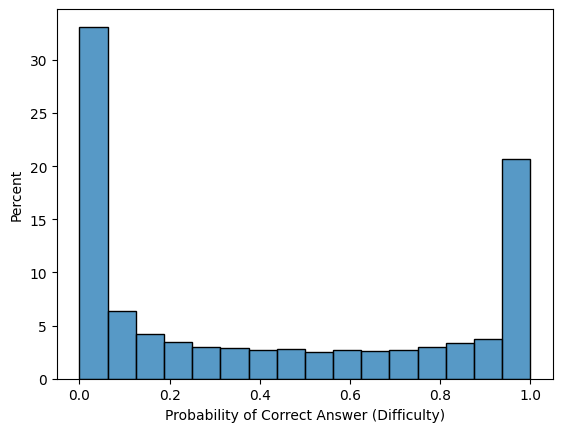

In [63]:
sns.histplot(all_rewards, binwidth=0.0625, stat='percent')

plt.xlabel('Probability of Correct Answer (Difficulty)')
plt.show()

In [67]:
subset_correct_lengths = []
subset_incorrect_lengths = []

for i in range(0, 17):
    subset = ds.filter(lambda x: x['reward'] == i / 16)
    average_correct_length = sum(subset['correct_length']) / len(subset)
    average_incorrect_length = sum(subset['incorrect_length']) / len(subset)
    subset_correct_lengths.append(average_correct_length)
    subset_incorrect_lengths.append(average_incorrect_length)

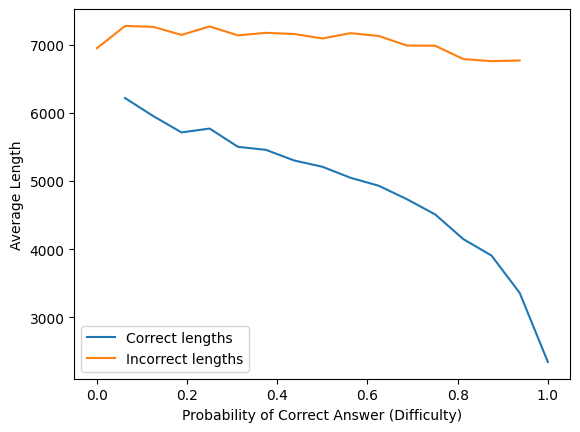

In [71]:
sns.lineplot(x=[i / 16 for i in range(0, 17)][1:], y=subset_correct_lengths[1:], label='Correct lengths')
sns.lineplot(x=[i / 16 for i in range(0, 17)][:-1], y=subset_incorrect_lengths[:-1], label='Incorrect lengths')
plt.xlabel('Probability of Correct Answer (Difficulty)')
plt.ylabel('Average Length')
plt.legend()
plt.show()